In [ ]:
import json
import pandas as pd
import os
import glob

# 파일 경로 설정
directory_path = r'C:\Users\EL0017\Downloads\089.차량 내 탑승자 상황 인식 영상 데이터\01.데이터\1.Training\라벨링데이터\abnormal_230303_add\new_TL1'

# JSON 파일 목록을 불러옵니다.
json_files = glob.glob(os.path.join(directory_path, '**/*.json'), recursive=True)
# 모든 JSON 파일을 읽고 데이터를 수집합니다.
all_data = []
for file in json_files:
    with open(file, 'r', encoding='utf-8') as json_file:
        data = json.load(json_file)
        for scene in data['scene']['data']:
            for occupant in scene['occupant']:
                all_data.append({
                    'scene_id': data['scene_info']['scene_id'],
                    'category_name': data['scene_info']['category_name'],
                    'img_name': scene['img_name'],
                    'occupant_id': occupant['occupant_id'],
                    'occupant_sex': data['occupant_info'][0]['occupant_sex'],
                    'occupant_age': data['occupant_info'][0]['occupant_age'],
                    'occupant_position': data['occupant_info'][0]['occupant_posotion'],
                    'body_b_box': occupant['body_b_box'],
                    'face_b_box': occupant['face_b_box'],
                    'action': occupant['action'],
                    'emotion': occupant['emotion']
                })
                

# 데이터프레임 생성
df = pd.DataFrame(all_data)

# 데이터프레임 출력
print(df.head())


          scene_id category_name                    img_name occupant_id  \
0  SGA2100001S0001          물건찾기  SGA2100001S0001IMG0001.jpg   occupant1   
1  SGA2100001S0001          물건찾기  SGA2100001S0001IMG0002.jpg   occupant1   
2  SGA2100001S0001          물건찾기  SGA2100001S0001IMG0003.jpg   occupant1   
3  SGA2100001S0001          물건찾기  SGA2100001S0001IMG0004.jpg   occupant1   
4  SGA2100001S0001          물건찾기  SGA2100001S0001IMG0005.jpg   occupant1   

  occupant_sex occupant_age occupant_position  \
0            M          30대             front   
1            M          30대             front   
2            M          30대             front   
3            M          30대             front   
4            M          30대             front   

                                          body_b_box  \
0  [456.63999023437503, 64.26282788628478, 823.36...   
1  [410.239990234375, 61.0656723307292, 869.76000...   
2  [309.43999023437505, 94.63580566406254, 970.56...   
3  [205.43999023437502, 

In [13]:
df.head()

,scene_id,category_name,img_name,occupant_id,occupant_sex,occupant_age,occupant_position,body_b_box,face_b_box,action,emotion
0,SGA2100001S0001,물건찾기,SGA2100001S0001IMG0001.jpg,occupant1,M,30대,front,"[456.63999023437503, 64.26282788628478, 823.36...","[712, 68.79857777777775, 269.43999023437505, 2...",무언가를보다,중립
1,SGA2100001S0001,물건찾기,SGA2100001S0001IMG0002.jpg,occupant1,M,30대,front,"[410.239990234375, 61.0656723307292, 869.76000...","[675.2, 65.60142222222221, 272.63999023437503,...",무언가를보다,중립
2,SGA2100001S0001,물건찾기,SGA2100001S0001IMG0003.jpg,occupant1,M,30대,front,"[309.43999023437505, 94.63580566406254, 970.56...","[310.40000000000003, 95.97440000000006, 336.63...",허리굽히다,중립
3,SGA2100001S0001,물건찾기,SGA2100001S0001IMG0004.jpg,occupant1,M,30대,front,"[205.43999023437502, 144.19171677517352, 1074....","[204.8, 145.53031111111113, 363.839990234375, ...",허리굽히다,중립
4,SGA2100001S0001,물건찾기,SGA2100001S0001IMG0005.jpg,occupant1,M,30대,front,"[461.43999023437493, 64.26282788628451, 818.56...","[707.2, 65.60142222222214, 277.439990234375, 2...",허리굽히다,중립


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238067 entries, 0 to 238066
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   scene_id           238067 non-null  object
 1   category_name      238067 non-null  object
 2   img_name           238067 non-null  object
 3   occupant_id        238067 non-null  object
 4   occupant_sex       238067 non-null  object
 5   occupant_age       238067 non-null  object
 6   occupant_position  238067 non-null  object
 7   body_b_box         238067 non-null  object
 8   face_b_box         238067 non-null  object
 9   action             238067 non-null  object
 10  emotion            238067 non-null  object
dtypes: object(11)
memory usage: 20.0+ MB


In [15]:
plt.rc('font', family='Malgun Gothic')


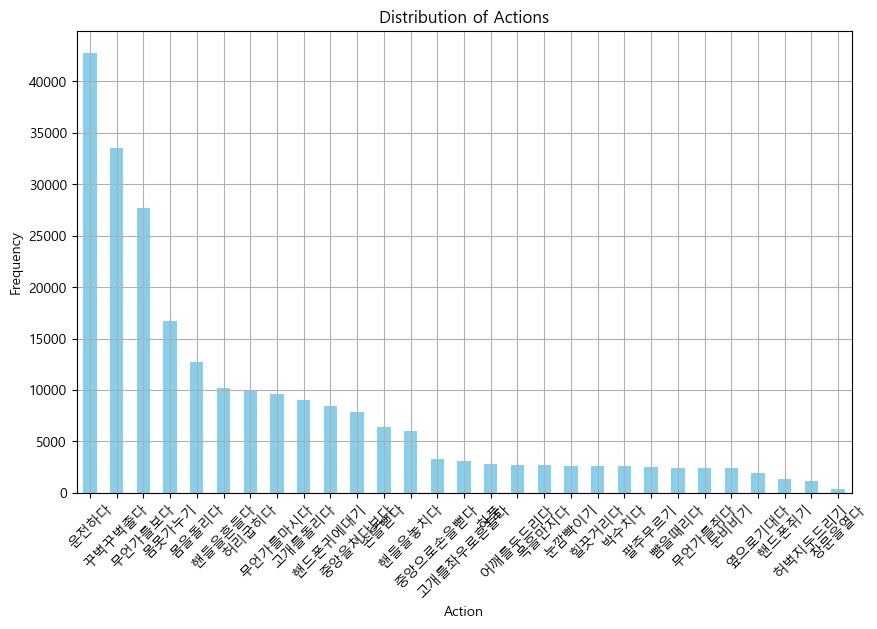

In [ ]:
plt.rc('font', family='Malgun Gothic')


import matplotlib.pyplot as plt

# 'action' 열의 데이터 분포를 계산
action_counts = df['action'].value_counts()

# 데이터 분포를 바 차트로 시각화
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
action_counts.plot(kind='bar', color='skyblue')  # 막대 그래프 형식
plt.title('Distribution of Actions')  # 그래프 제목
plt.xlabel('Action')  # x축 라벨
plt.ylabel('Frequency')  # y축 라벨
plt.xticks(rotation=45)  # x축 라벨 회전
plt.grid(True)  # 격자 표시
plt.show()  # 그래프 출력
